In [47]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Downloads/Month_Value_1.csv")
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010072.12,12729,1257.763541,30024676
1,01.02.2015,15807587.45,11636,1358.507000,30024676
2,01.03.2015,22047146.02,15922,1384.697024,30024676
3,01.04.2015,18814583.29,15227,1235.606705,30024676
4,01.05.2015,14021479.61,8620,1626.621765,30024676


In [5]:
df.shape

(64, 5)

In [6]:
df.describe

<bound method NDFrame.describe of         Period      Revenue  Sales_quantity  Average_cost  \
0   01.01.2015  16010072.12           12729   1257.763541   
1   01.02.2015  15807587.45           11636   1358.507000   
2   01.03.2015  22047146.02           15922   1384.697024   
3   01.04.2015  18814583.29           15227   1235.606705   
4   01.05.2015  14021479.61            8620   1626.621765   
..         ...          ...             ...           ...   
59  01.12.2019  58756473.66           38069   1543.420464   
60  01.01.2020  56288300.87           27184   2070.640850   
61  01.02.2020  40225243.26           23509   1711.057181   
62  01.03.2020  50022165.23           32569   1535.882748   
63  01.04.2020  52320692.94           26615   1965.834790   

    The_average_annual_payroll_of_the_region  
0                                   30024676  
1                                   30024676  
2                                   30024676  
3                                   30024676 

<Axes: >

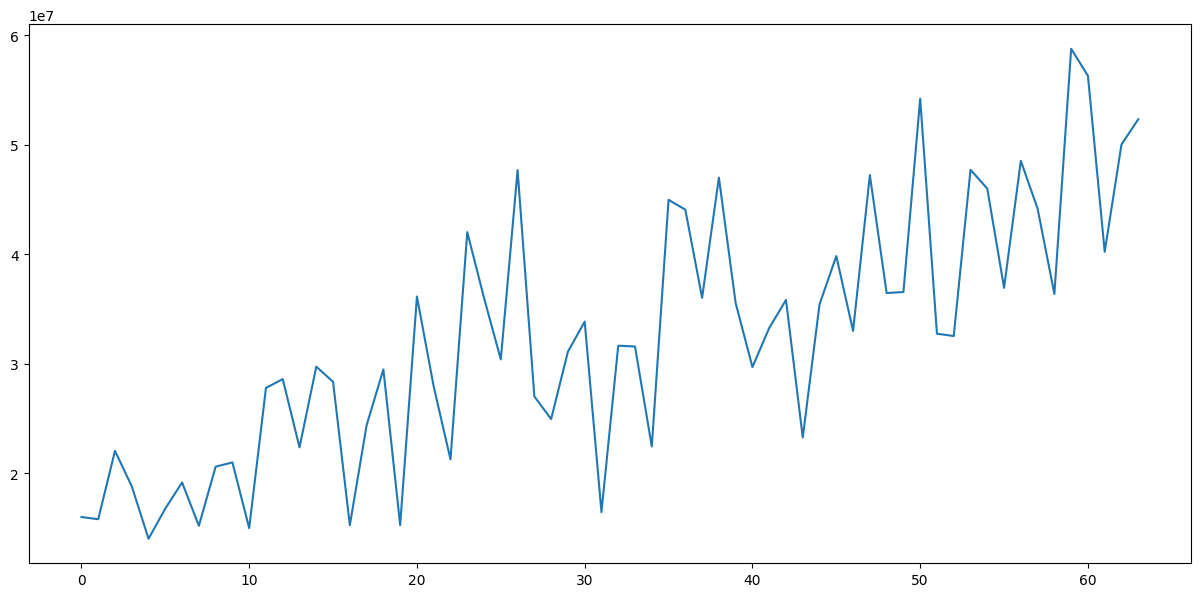

In [7]:
df['Revenue'].plot(figsize = (15,7))

In [8]:
df1 = df[['Period', 'Revenue']]
df1

,Period,Revenue
0,01.01.2015,16010072.12
1,01.02.2015,15807587.45
2,01.03.2015,22047146.02
3,01.04.2015,18814583.29
4,01.05.2015,14021479.61
...,...,...
59,01.12.2019,58756473.66
60,01.01.2020,56288300.87
61,01.02.2020,40225243.26
62,01.03.2020,50022165.23


In [23]:
x = df1[:-7]
y = df1[-7:]
x.shape, y.shape

((57, 3), (7, 3))

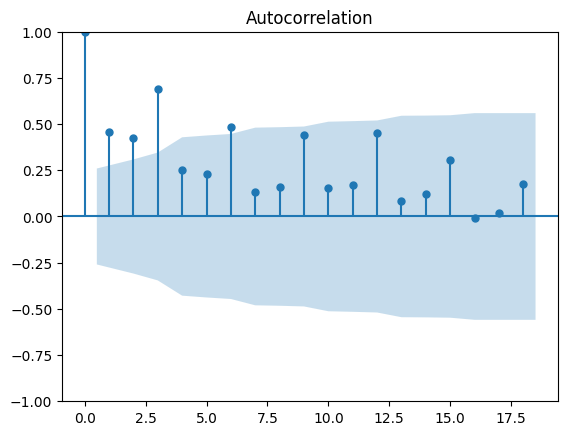

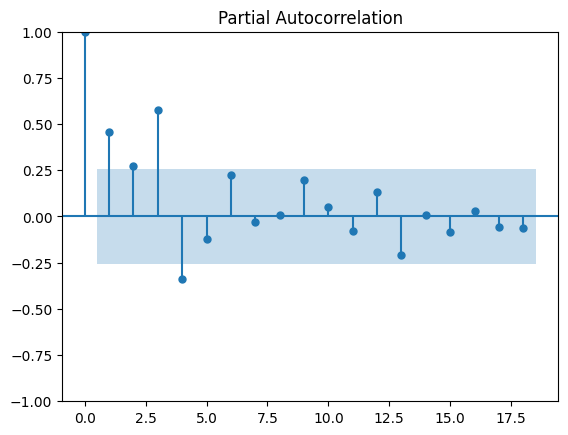

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_og = plot_acf(x['Revenue'])
pacf_og = plot_pacf(x['Revenue'])

In [25]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(x['Revenue'])
print(f'p-value: {adf_test[1]}')

p-value: 0.7312290408282671


<Axes: >

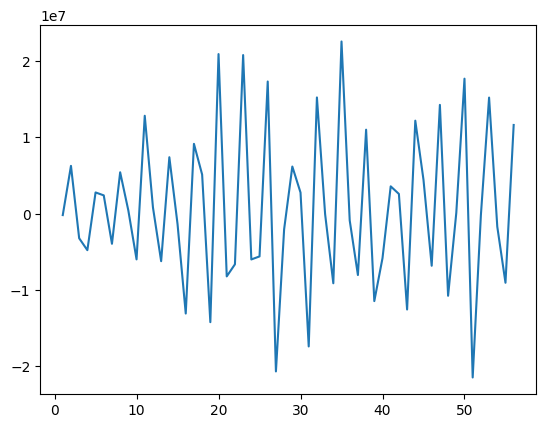

In [26]:
x_diff = x['Revenue'].diff().dropna()
x_diff.plot()

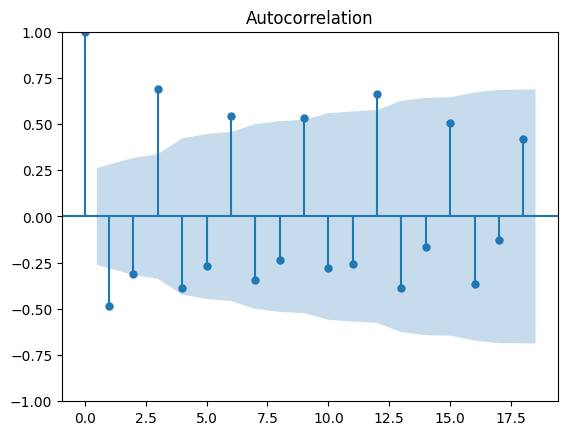

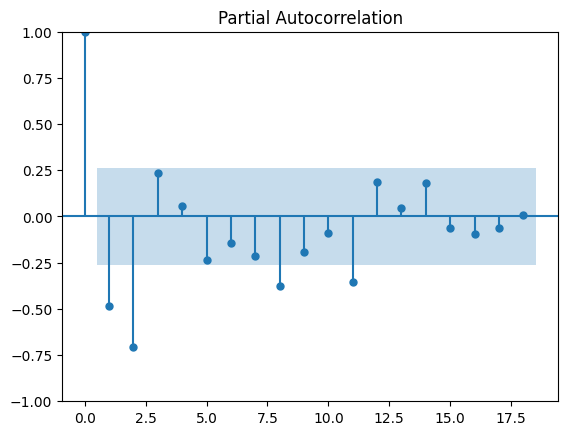

In [27]:
acf_diff = plot_acf(x_diff)
pacf_diff = plot_pacf(x_diff)

In [28]:
adf_test1 = adfuller(x_diff)
print(f'p-value: {adf_test1[1]}')

p-value: 2.2631926966911145e-06


In [45]:
from statsmodels.tsa.arima.model import ARIMA
np_x = np.asarray(x['Revenue'])
model = ARIMA(np_x, order = (2,1,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   57
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -955.777
Date:                Tue, 07 May 2024   AIC                           1923.553
Time:                        01:50:26   BIC                           1935.705
Sample:                             0   HQIC                          1928.265
                                 - 57                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0415      0.038    -27.442      0.000      -1.116      -0.967
ar.L2         -0.9952      0.028    -34.994      0.000      -1.051      -0.939
ma.L1          0.5740      0.213      2.701      0.0

In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


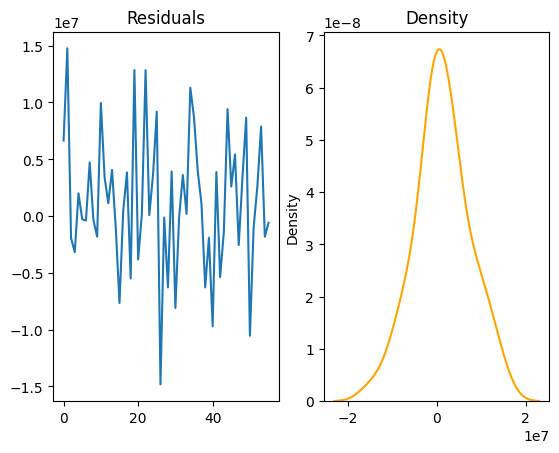

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(residuals)
ax[0].set_title('Residuals')
sns.kdeplot(residuals, ax=ax[1], color='orange')
ax[1].set_title('Density')
plt.show()

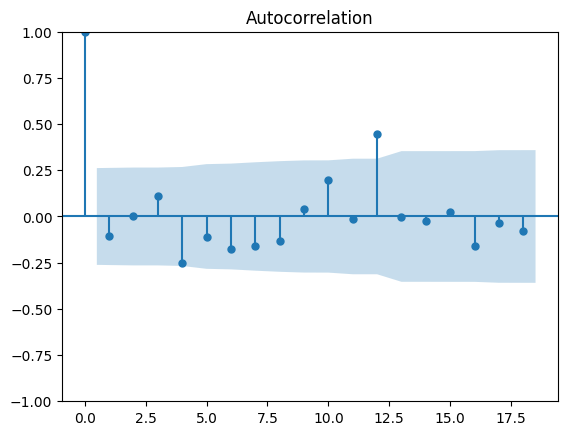

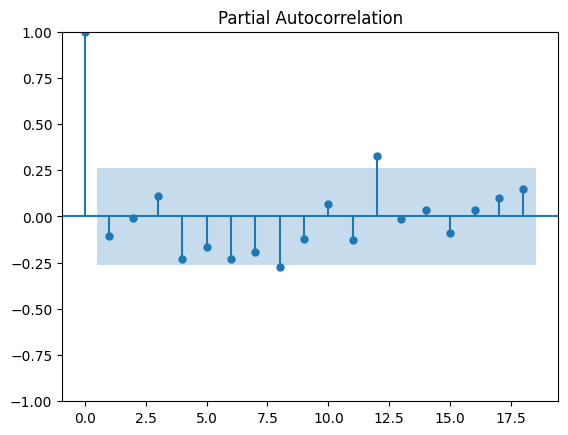

In [47]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

C:\Users\HP\AppData\Local\Temp\ipykernel_9112\2132395717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast_manual'] = [None]*len(x) + list(forecast_test)


<Axes: >

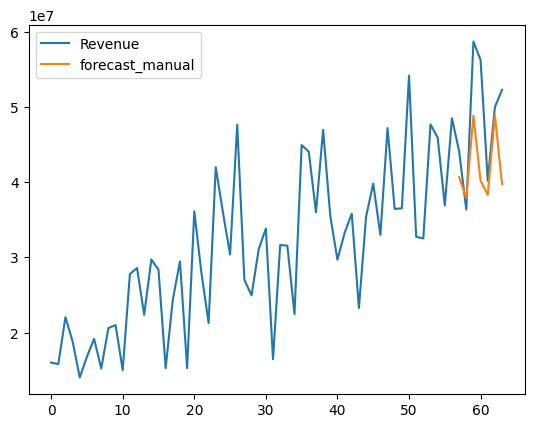

In [48]:
forecast_test = model_fit.forecast(len(y))
df1['forecast_manual'] = [None]*len(x) + list(forecast_test)
df1.plot()

In [36]:
import pmdarima as pm
auto_arima = pm.auto_arima(x['Revenue'], stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [22]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -731.381
Date:                Tue, 07 May 2024   AIC                           1474.761
Time:                        01:40:51   BIC                           1485.328
Sample:                             0   HQIC                          1478.658
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.772e+05   7.03e-09   9.64e+13      0.000    6.77e+05    6.77e+05
ar.L1         -0.9278      0.074    -12.601      0.000      -1.072      -0.784
ar.L2         -0.9101      0.078    -11.715      0.000      -1.062      -0.758
ma.L1          0.4553      0.154      2.962      0.003       0.154       0.757
ma.L2          0.7323      0.164      4.454      0.000       0.410       1.055
sigma2      3.469e+13      6e-16   5.78e+28      0.000    3.47e+13    3.47e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.53   Prob(JB):                         0.64
Heteroskedasticity (H):               1.53   Skew:                            -0.10
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+45. Standard errors may be unstable.
"""

In [50]:
import statsmodels.api as sm
model3 = sm.tsa.statespace.SARIMAX(df1['Revenue'], order = (2,1,3), seasonal_order = (2,1,3,12)) #third video, seasonality included
res = model3.fit()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\HP\AppData\Local\Temp\ipykernel_9112\2114805745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast_s'] = res.predict(start = 55, end = 63, dynamic = True)


<Axes: >

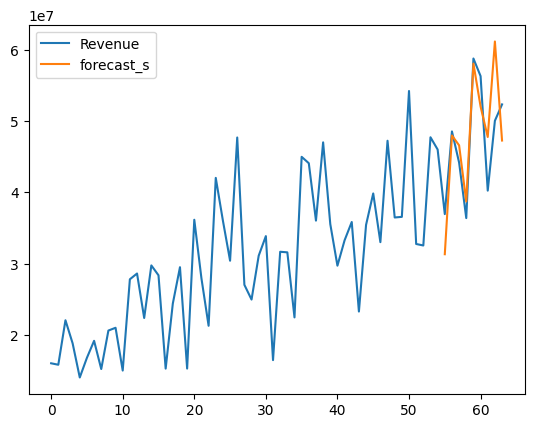

In [54]:
df1['forecast_s'] = res.predict(start = 55, end = 63, dynamic = True)
df1[['Revenue', 'forecast_s']].plot()